In [1]:
import numpy as np
import os
import keras
from keras.datasets import cifar10
from keras.models  import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print("Training data:")
print( "Number of examples: ", X_train.shape[0])
print( "Number of channels:",X_train.shape[3] )
print( "Image size:", X_train.shape[1], X_train.shape[2])
print("\n")
print( "Test data:")
print( "Number of examples:", X_test.shape[0])
print( "Number of channels:", X_test.shape[3])
print( "Image size:",X_test.shape[1], X_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32


Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


#### Visualize some images from CIFAR-10 dataset. 
It contains 10 classes namely, airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

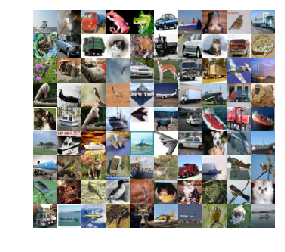

In [5]:
plot = []
for i in range(1,10):
    plot_image = X_train[100*i,:,:,:]
    for j in range(1,10):
        plot_image = np.concatenate((plot_image, X_train[100*i+j,:,:,:]), axis=1)
    if i==1:
        plot = plot_image
    else:
        plot = np.append(plot, plot_image, axis=0)

plt.imshow(plot)
plt.axis('off')
plt.show()

#### Normalize the data.

In [4]:
print("mean before normalization: {}".format(np.mean(X_train)))
print("std before normalization: {}".format(np.std(X_train)))

mean=[0,0,0]
std=[0,0,0]

X_train_norm = np.ones(X_train.shape)
X_test_norm = np.ones(X_test.shape)
for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
    
for i in range(3):
    X_train_norm[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    X_train_norm[:,:,:,i] = X_train_norm[:,:,:,i] / std[i]
    X_test_norm[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    X_test_norm[:,:,:,i] = X_test_norm[:,:,:,i] / std[i]
        
    
X_train = X_train_norm
X_test = X_test_norm

print("mean after normalization: {}".format(np.mean(X_train)))
print("std after normalization: {}".format(np.std(X_train)))

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996


#### Training Parameters

In [5]:
batchSize = 50                    #-- Training Batch Size
num_classes = 10                  #-- Number of classes in CIFAR-10 dataset
num_epochs = 50                   #-- Number of epochs for training   
learningRate= 0.001               #-- Learning rate for the network
lr_weight_decay = 0.95            #-- Learning weight decay. Reduce the learn rate by 0.95 after epoch


img_rows, img_cols = 32, 32       #-- input image dimensions

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()                                                #-- Sequential container.

model.add(Conv2D(6, (5, 5),                                         #-- 6 outputs (6 filters), 5x5 convolution kernel
                        strides=(1, 1),
                        padding='valid',
                        input_shape=(img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
model.add(Conv2D(16, (5, 5)))                                       #-- 16 outputs (16 filters), 5x5 convolution kernel
model.add(Activation('relu'))                                       #-- ReLU non-linearity
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
model.add(Dense(120))                                               #-- 120 outputs fully connected layer
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(Dense(84))                                                #-- 84 outputs fully connected layer
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
__________

#### Compile and then train the network

In [8]:
sgd = SGD(lr=learningRate, decay = lr_weight_decay)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#-- switch verbose=0 if you get error "I/O operation from closed file"
history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 41s 814us/step - loss: 1.8241 - acc: 0.3356 - val_loss: 1.6081 - val_acc: 0.4142
Epoch 2/50
50000/50000 [==============================] - 41s 819us/step - loss: 1.5212 - acc: 0.4504 - val_loss: 1.5213 - val_acc: 0.4457
Epoch 3/50
50000/50000 [==============================] - 43s 869us/step - loss: 1.4198 - acc: 0.4907 - val_loss: 1.4316 - val_acc: 0.4919
Epoch 4/50
50000/50000 [==============================] - 40s 810us/step - loss: 1.3469 - acc: 0.5191 - val_loss: 1.3489 - val_acc: 0.5236
Epoch 5/50
50000/50000 [==============================] - 40s 803us/step - loss: 1.2902 - acc: 0.5398 - val_loss: 1.2770 - val_acc: 0.5453
Epoch 6/50
50000/50000 [==============================] - 41s 813us/step - loss: 1.2395 - acc: 0.5626 - val_loss: 1.2427 - val_acc: 0.5620
Epoch 7/50
50000/50000 [==============================] - 42s 830us/step - loss: 1.2048 - acc: 0.5757 - val_loss: 1.

#### Print the scores

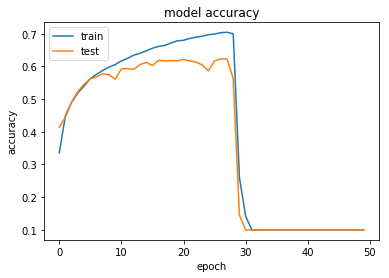

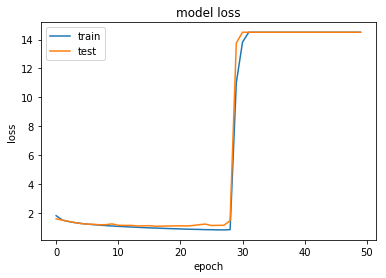

In [9]:
#-- summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#-- summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
#-- test the network
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 14.506285668945312
Test accuracy: 0.1


** Q1: [0.5 point] **  

What are the number of parameters in convolution layers with K filters each of size 3wh.  

** A1: **  

3 x w x h x K weights and K biases  

** Q2: [0.5 points] **  

What are the number of parameters in a max pooling operation?  

** A2: **  

The max-pooling layers just replace a 2x2 neighborhood by its maximum value. So there are NO parameters needed to be learnt in a pooling layer.  

Q3: [0.5 point]  

Which of the operations contain most number of parameters?  
(a) conv (b) pool (c) Fully con-nected layer (FC) (d) Relu  

** A3: **  

The highest number of parameters are learnt in Fully Connected Layer.  

Q4: [0.5 point]  

Which operation consume most amount of memory?  
(a) initial convolution layers (b) fully-connected layers at the end  

** A4: **  

Huge amount of memory is consumed in the initial convolution layers as it has to remember all the images with various of channels.  

** Q5: [2 points] **  

Experiment with **learning rate** (learningRate) and notice the behaviour of the learning process.
Plot your observations in a graph with brief explanation. Take the values on a log scale. Vary only
one parameter at a time.

**Observations**  
1. As the learning rate increases the model takes more time (no of epochs) to converge  
2. If the learning rate is very large then the training might not even converge.  
3. A carefull choice of learning is very important int training neural networks.  

Graphs shown below in support of the observations

Training at Learning Rate = 1e-05
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_21 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_22 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatte

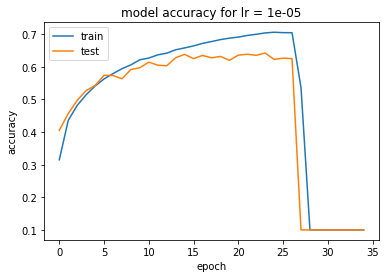

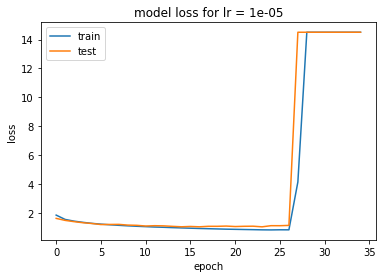

Training at Learning Rate = 0.0001
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_26 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_27 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatt

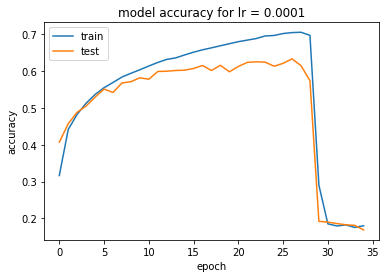

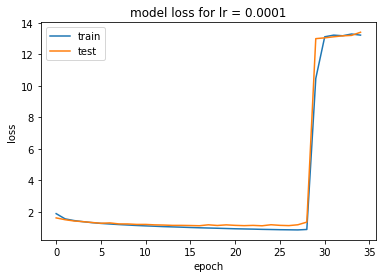

Training at Learning Rate = 0.001
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_31 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_32 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatte

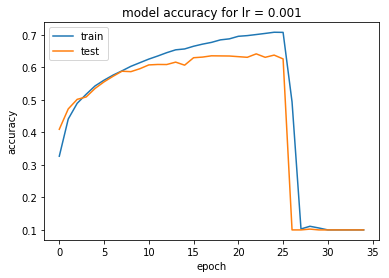

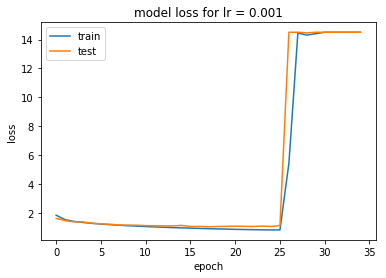

Training at Learning Rate = 0.01
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_36 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_37 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten

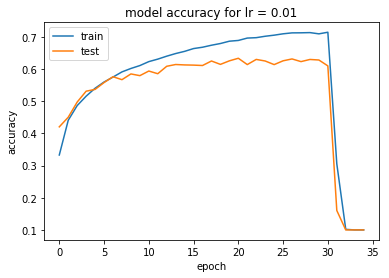

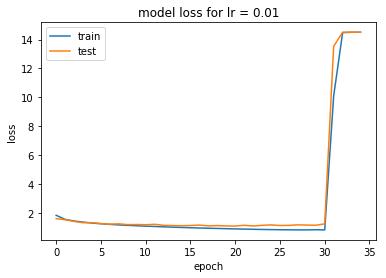

Training at Learning Rate = 0.1
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_41 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_42 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_

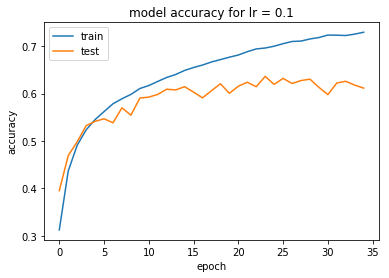

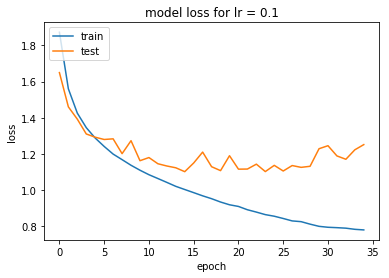

Training at Learning Rate = 1
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_46 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_47 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_10

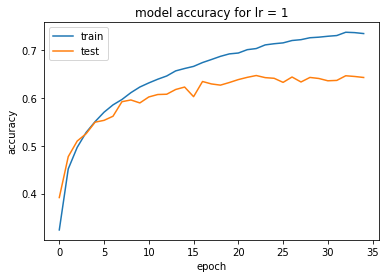

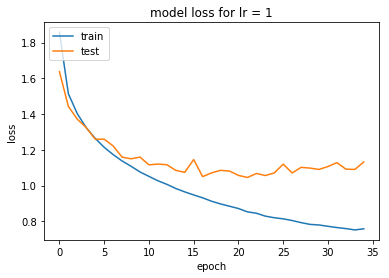

In [14]:
lr_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
num_epochs = 35                   #-- Number of epochs for training

for l_rate in lr_values:
    print("Training at Learning Rate = {}".format(l_rate))
    print("-----------------------------------")
    
    model = Sequential()                                                #-- Sequential container.

    model.add(Conv2D(6, (5, 5),                                         #-- 6 outputs (6 filters), 5x5 convolution kernel
                            strides=(1, 1),
                            padding='valid',
                            input_shape=(img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
    model.add(Activation('relu'))                                       #-- ReLU non-linearity 
    model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
    model.add(Conv2D(16, (5, 5)))                                       #-- 16 outputs (16 filters), 5x5 convolution kernel
    model.add(Activation('relu'))                                       #-- ReLU non-linearity
    model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

    model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
    model.add(Dense(120))                                               #-- 120 outputs fully connected layer
    model.add(Activation('relu'))                                       #-- ReLU non-linearity 
    model.add(Dense(84))                                                #-- 84 outputs fully connected layer
    model.add(Activation('relu'))                                       #-- ReLU non-linearity 
    model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
    model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

    print(model.summary())
    
    sgd = SGD(lr=l_rate, decay = lr_weight_decay)
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

    #-- switch verbose=0 if you get error "I/O operation from closed file"
    history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
              verbose=1, shuffle=True, validation_data=(X_test, Y_test))
    
    
    #-- summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy for lr = {}'.format(l_rate))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #-- summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss for lr = {}'.format(l_rate))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

** Q6: [2 points] **

Currently, the **batch-size** is 50. Notice the training loss curve if batch size is changed to 1. Is it smooth or fluctating? Show the effect of batch-size on the learning curves in a plot.
Take the values on a log scale. Vary only one parameter at a time.

** A6: **

**Observations**   
1. When the batch-size is 1 then the loss-curve is fluctuating and not stable.  
2. As the batch-size increases the training loss curve starts smoothening.  

See the graphs below in support of the observations.

Training with Batch Size = 1
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (

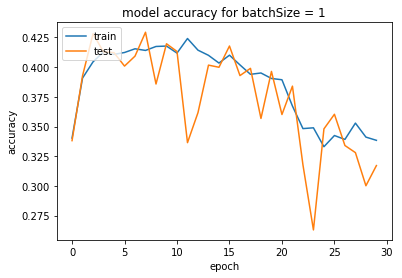

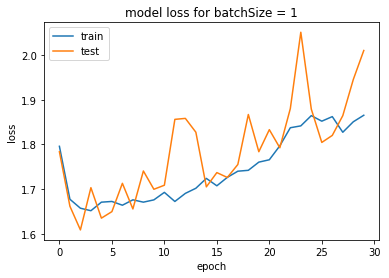

Training with Batch Size = 8
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (

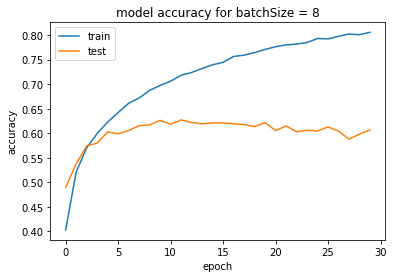

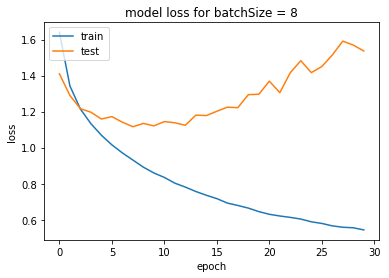

Training with Batch Size = 16
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_12 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 

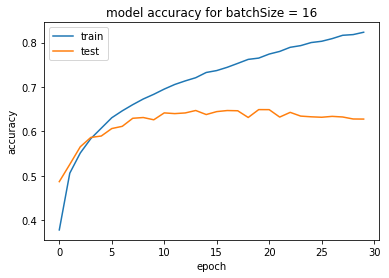

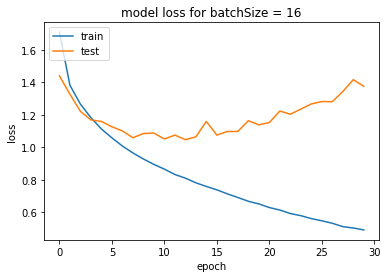

Training with Batch Size = 64
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_16 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_17 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 

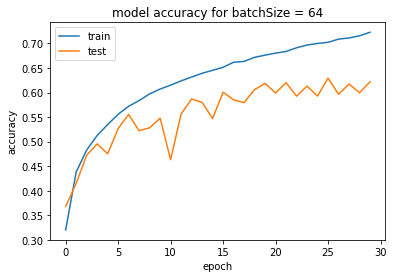

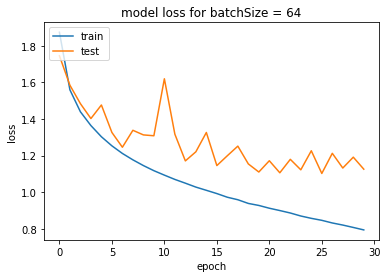

Training with Batch Size = 128
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_21 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_22 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5

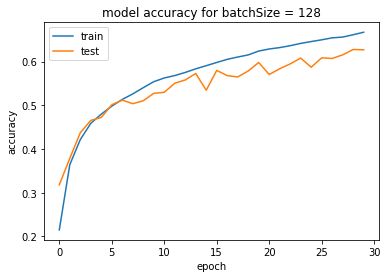

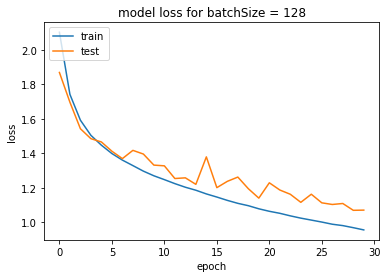

Training with Batch Size = 256
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_26 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_27 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6

In [ ]:
batchSize_values = [1, 8, 16, 64, 128, 256]
num_epochs = 30                                                         #-- Number of epochs for training
#-- The learning rate as per above investigation that gives the best val accuracy as well as taking the least training time
l_rate = 0.00001

for batchSize in batchSize_values:
    print("Training with Batch Size = {}".format(batchSize))
    print("-----------------------------------")
    
    model = Sequential()                                                #-- Sequential container.

    model.add(Conv2D(6, (5, 5),                                         #-- 6 outputs (6 filters), 5x5 convolution kernel
                            strides=(1, 1),
                            padding='valid',
                            input_shape=(img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
    model.add(Activation('relu'))                                       #-- ReLU non-linearity 
    model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
    model.add(Conv2D(16, (5, 5)))                                       #-- 16 outputs (16 filters), 5x5 convolution kernel
    model.add(Activation('relu'))                                       #-- ReLU non-linearity
    model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

    model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
    model.add(Dense(120))                                               #-- 120 outputs fully connected layer
    model.add(Activation('relu'))                                       #-- ReLU non-linearity 
    model.add(Dense(84))                                                #-- 84 outputs fully connected layer
    model.add(Activation('relu'))                                       #-- ReLU non-linearity 
    model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
    model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

    print(model.summary())
    
    sgd = SGD(lr=l_rate, decay = lr_weight_decay)
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

    #-- switch verbose=0 if you get error "I/O operation from closed file"
    history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
              verbose=1, shuffle=True, validation_data=(X_test, Y_test))
    
    
    #-- summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy for batchSize = {}'.format(batchSize))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #-- summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss for batchSize = {}'.format(batchSize))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

** Q7: [2 points] **

Increase the **number of convolution filters** and experiment. Present your observations using plots and brief explanations.
Take the values on a log scale. Vary only one parameter at a time.

** A7: **

**Observations**   
1. Increasing the number of convolution filters in the first layer, improves the accuracy upto a certain number of filters as the model is able to learn more sophesticated and even minute features.  
2. However, increasing the no of filters beyond a certain limit results in overfitting and leads to decrease in accuracy of the model.  

Graphs shown below in support of the observations.

Training with #Output filters at Layer1 = 1
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 1)         76        
_________________________________________________________________
activation_31 (Activation)   (None, 28, 28, 1)         0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 16)        416       
_________________________________________________________________
activation_32 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 16)          0         
______________________________________________________________

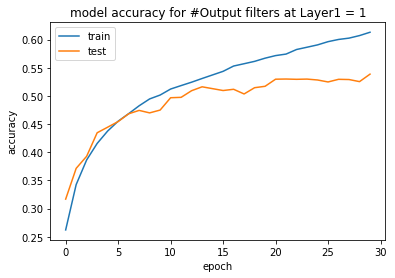

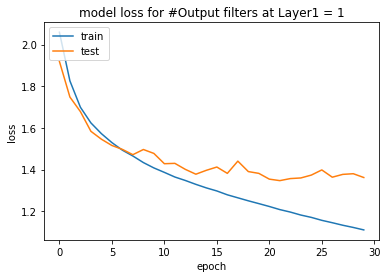

Training with #Output filters at Layer1 = 10
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 10)        760       
_________________________________________________________________
activation_36 (Activation)   (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 16)        4016      
_________________________________________________________________
activation_37 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 16)          0         
_____________________________________________________________

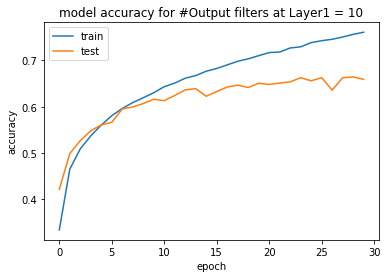

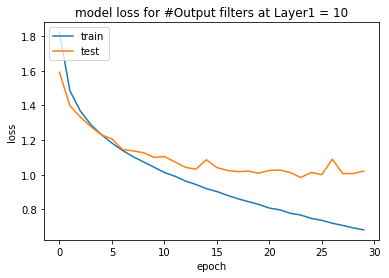

Training with #Output filters at Layer1 = 25
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 25)        1900      
_________________________________________________________________
activation_41 (Activation)   (None, 28, 28, 25)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 25)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 16)        10016     
_________________________________________________________________
activation_42 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 16)          0         
_____________________________________________________________

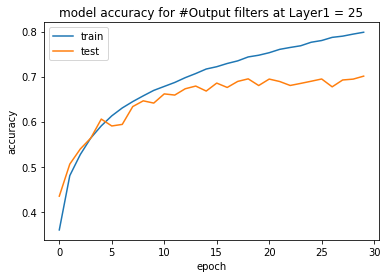

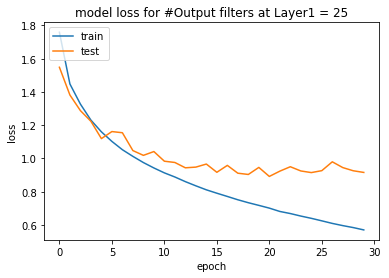

Training with #Output filters at Layer1 = 50
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 50)        3800      
_________________________________________________________________
activation_46 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 16)        20016     
_________________________________________________________________
activation_47 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 16)          0         
_____________________________________________________________

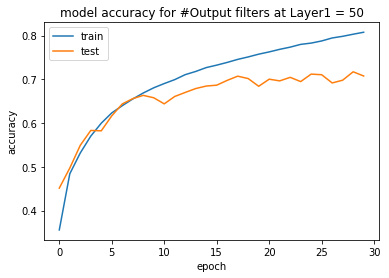

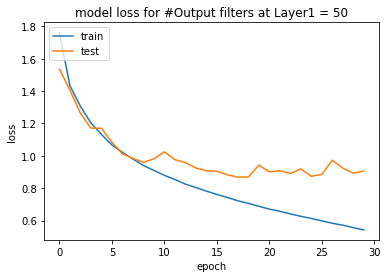

Training with #Output filters at Layer1 = 100
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 100)       7600      
_________________________________________________________________
activation_51 (Activation)   (None, 28, 28, 100)       0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 16)        40016     
_________________________________________________________________
activation_52 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 16)          0         
____________________________________________________________

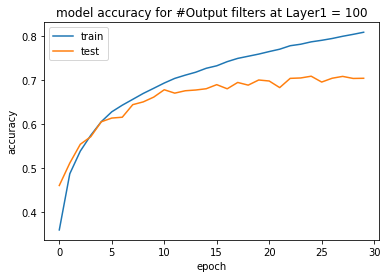

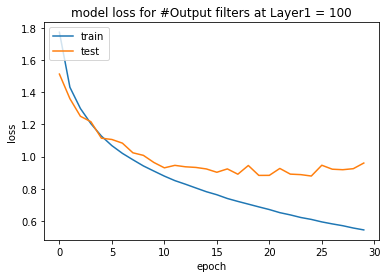

In [9]:
n_conv_filters_l1 = [1, 10, 25, 50, 100]
num_epochs = 30                                                        #-- Number of epochs for training
batchSize = 50
#-- The learning rate as per above investigation that gives the best val accuracy as well as taking the least training time
l_rate = 0.00001

for K in n_conv_filters_l1:
    print("Training with #Output filters at Layer1 = {}".format(K))
    print("-----------------------------------")
    
    model = Sequential()                                                #-- Sequential container.

    model.add(Conv2D(K, (5, 5),                                         #-- 6 outputs (6 filters), 5x5 convolution kernel
                            strides=(1, 1),
                            padding='valid',
                            input_shape=(img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
    model.add(Activation('relu'))                                       #-- ReLU non-linearity 
    model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
    model.add(Conv2D(16, (5, 5)))                                       #-- 16 outputs (16 filters), 5x5 convolution kernel
    model.add(Activation('relu'))                                       #-- ReLU non-linearity
    model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

    model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
    model.add(Dense(120))                                               #-- 120 outputs fully connected layer
    model.add(Activation('relu'))                                       #-- ReLU non-linearity 
    model.add(Dense(84))                                                #-- 84 outputs fully connected layer
    model.add(Activation('relu'))                                       #-- ReLU non-linearity 
    model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
    model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

    print(model.summary())
    
    sgd = SGD(lr=l_rate, decay = lr_weight_decay)
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

    #-- switch verbose=0 if you get error "I/O operation from closed file"
    history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
              verbose=1, shuffle=True, validation_data=(X_test, Y_test))
    
    
    #-- summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy for #Output filters at Layer1 = {}'.format(K))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #-- summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss for #Output filters at Layer1 = {}'.format(K))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

** Q8: [2 points] **

What do you observe if you increase the **number of layers** (depth of the network) ? Present your observations using plots and brief explanations. 

** A8: **

**Observations**  
1. If the Neural Network is wider and deeper the back-propagation and hyper-parameters becomes very complicated.  
2. However increasing the number of hidden layers increases the accuracy and also fit even most complex non-linear classifiers.  

Graph below in support of the observations

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 6)         0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 16)        2416      
_________________________________________________________________
activation_15 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        12832     
_________________________________________________________________
activation_16 (Activation)   (None, 16, 16, 32)        0         
__________

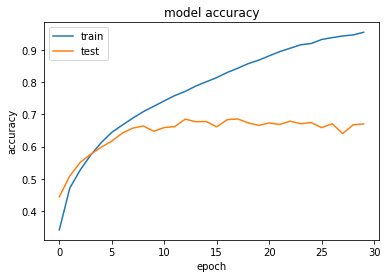

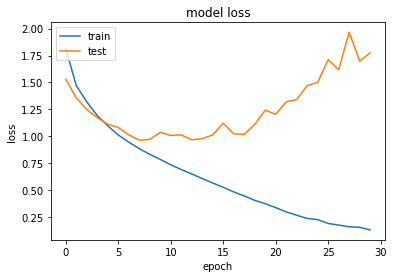

In [10]:
batchSize = 50                    #-- Training Batch Size
num_epochs = 30                   #-- Number of epochs for training   
learningRate= 0.00001             #-- Learning rate for the network

# Adding 2 CNN layers to the Deep Network
model = Sequential()                                                #-- Sequential container.

model.add(Conv2D(6, (5, 5),                                         #-- 6 outputs (6 filters), 5x5 convolution kernel
                        strides=(1, 1),
                        padding='same',
                        input_shape=(img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
model.add(Conv2D(16, (5, 5), strides=(1, 1), padding='same'))      #-- 16 outputs (16 filters), 5x5 convolution kernel
model.add(Activation('relu'))                                       #-- ReLU non-linearity
model.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same'))      #-- 32 outputs (16 filters), 5x5 convolution kernel
model.add(Activation('relu'))                                       #-- ReLU non-linearity
model.add(Conv2D(64, (5, 5)))                                       #-- 64 outputs (16 filters), 5x5 convolution kernel
model.add(Activation('relu'))                                       #-- ReLU non-linearity
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
model.add(Dense(120))                                               #-- 120 outputs fully connected layer
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(Dense(84))                                                #-- 84 outputs fully connected layer
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

print(model.summary())

sgd = SGD(lr=learningRate, decay = lr_weight_decay)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#-- switch verbose=0 if you get error "I/O operation from closed file"
history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))

#-- summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#-- summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

** Q9: [2 points] **

What do you observe if you change the **activation functions** (tanh, relu, sigmoid) ? Present your observations using plots and brief explanations.

** A9: **

**Observations** .  
1. The Rectified Linear Unit (ReLU) activation function gives the best accuracy in comparision with the other activation functions.  
2. It is because it eases the gradient computation and convergys faster when compared to the other activation functions.  

See the graphs below to support the observations.

Training with Activation Function = tanh
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________

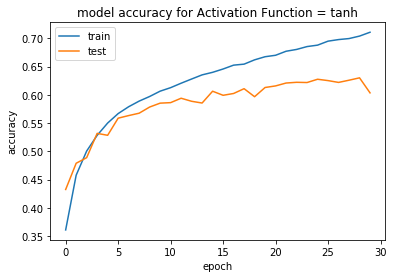

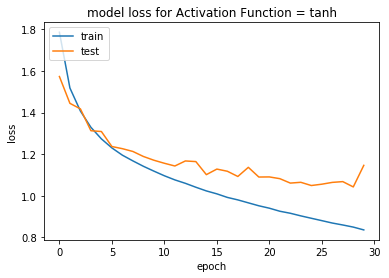

Training with Activation Function = relu
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________

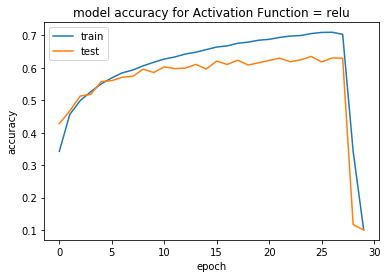

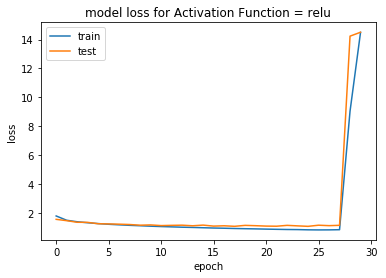

Training with Activation Function = sigmoid
-----------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_12 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
______________________________________________________________

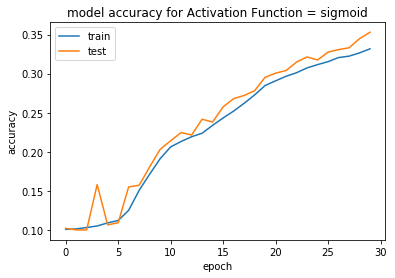

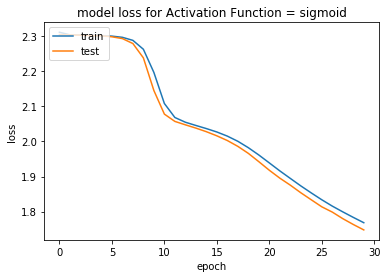

In [7]:
act_fn_values = ['tanh', 'relu', 'sigmoid']
num_epochs = 30                                                        #-- Number of epochs for training
batchSize = 50
#-- The learning rate as per above investigation that gives the best val accuracy as well as taking the least training time
l_rate = 0.00001

for actn_fn in act_fn_values:
    print("Training with Activation Function = {}".format(actn_fn))
    print("-----------------------------------")
    
    model = Sequential()                                                #-- Sequential container.

    model.add(Conv2D(6, (5, 5),                                         #-- 6 outputs (6 filters), 5x5 convolution kernel
                            strides=(1, 1),
                            padding='valid',
                            input_shape=(img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
    model.add(Activation(actn_fn))                                       #-- ReLU non-linearity 
    model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
    model.add(Conv2D(16, (5, 5)))                                       #-- 16 outputs (16 filters), 5x5 convolution kernel
    model.add(Activation(actn_fn))                                       #-- ReLU non-linearity
    model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

    model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
    model.add(Dense(120))                                               #-- 120 outputs fully connected layer
    model.add(Activation(actn_fn))                                       #-- ReLU non-linearity 
    model.add(Dense(84))                                                #-- 84 outputs fully connected layer
    model.add(Activation(actn_fn))                                       #-- ReLU non-linearity 
    model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
    model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

    print(model.summary())
    
    sgd = SGD(lr=l_rate, decay = lr_weight_decay)
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

    #-- switch verbose=0 if you get error "I/O operation from closed file"
    history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
              verbose=1, shuffle=True, validation_data=(X_test, Y_test))
    
    
    #-- summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy for Activation Function = {}'.format(actn_fn))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #-- summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss for Activation Function = {}'.format(actn_fn))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

** Q10: [1 points] **

CNN training requires lot of training data. In the absence of large training data, a common practice is to use synthetic data using operations such as flipping, scaling, etc. Can you think of any other two operations techniques that can help to increase the training set? Demonstrate these effects with sufficient explanation.

** A10: **

To Increase the training data we can use techniques like
1. Rotating the images - clockwise and anti clockwise.  
2. Taking mirror images about horizontal and vertical axes (increases the training set x4 times).  
3. Adding a little white noise using OpenCV.

Using Caffe, mirroring and random cropping are possible without changing actual DB.